In [ ]:
# Code source: https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664

In [1]:
# 1. IMPORT LIBRARIES

import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# 2. IMPORT THE DATASET

AAPL_stock_data = yf.download('AAPL', start='2021-08-15', end='2022-08-15')
AAPL_stock_data.head()

# We evaluated different strategies to store data, but in this model we are saving the pulled data to a csv file to store it locally and quickly load it into the algortith

AAPL_df = pd.DataFrame(AAPL_stock_data)
AAPL_df.to_csv("AAPL_data.csv")


[*********************100%***********************]  1 of 1 completed


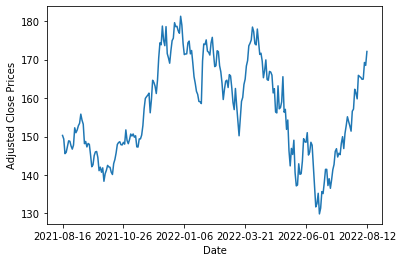

In [3]:
# 3. VISUALIZE THE DATA
# Plot a line chart of the adjusted close prices over time.

read_df = pd.read_csv("AAPL_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [4]:
# 4. DATA PRE-PROCESSING
# Clean the data so the algorithm can read it, we are going to remove missing or inconsistent values and change the index

# Step 4.1 : drop missing values

df = pd.read_csv("AAPL_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

# Step 4.2 : select x and y variables, we use 5 features
# x: values for the open, high, low, close and adj-close columns
# y: adj-close column

x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
print(x)
print(y)



[[148.53999329 151.19000244 146.47000122 151.11999512 150.27789307]
 [150.22999573 151.67999268 149.08999634 150.19000244 149.35308838]
 [149.80000305 150.72000122 146.1499939  146.36000061 145.54444885]
 ...
 [167.67999268 169.33999634 166.8999939  169.24000549 169.24000549]
 [170.05999756 170.99000549 168.19000244 168.49000549 168.49000549]
 [169.82000732 172.16999817 169.3999939  172.1000061  172.1000061 ]]
[150.27789307 149.35308838 145.54444885 145.88253784 147.36422729
 148.8757782  148.78625488 147.53327942 146.71784973 147.77194214
 152.26676941 150.98396301 151.66015625 152.79380798 153.44018555
 155.81689453 154.2456665  153.21147156 148.13989258 148.71665955
 147.29460144 148.19955444 147.96089172 145.24610901 142.14349365
 142.63075256 145.03727722 146.01182556 146.1013031  144.55993652
 141.11924744 142.03410339 140.71153259 141.85510254 138.36465454
 140.32368469 141.20872498 142.49153137 142.10369873 142.01420593
 140.72146606 140.12481689 142.95890808 144.03289795 145.7

In [5]:
# 4.3 DIVIDE DATA FOR TRAINING AND TESTING 
# Train: 30%
# Test: 70%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70,  random_state=0)

In [6]:
# 5. STANDARIZE THE DATA
# This step is included to improve the training speed and add stability to the model 

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [9]:
#6. DEFINE THE MODEL 

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)


[173.31904596 173.71739078 177.27825858 174.56745316 163.09212863
 171.75096692 169.89030133 175.52821747 149.00516333 154.92891489
 173.86991092 147.93962878 166.28172012 142.30965518 173.11463541
 159.5482937  146.487961   146.19198276 157.34864453 177.28871533
 177.28871533 147.8795379  156.05880789 160.68997717 148.51604019
 174.03422702 147.58764841 149.26713757 164.96525436 142.48623279
 142.3650239  162.82627441 163.24797214 146.18882803 137.75048395
 165.63088229 167.84931772 148.78511279 148.02331326 168.7217756
 174.16029272 152.27617068 169.81191782 131.39381973 171.57905392
 177.27969266 147.82953772 144.92660428 149.54424255 158.77711661
 161.19640555 174.84918585 164.66114224 165.51453467 150.10894482
 171.89483609 149.72341879 149.99446649 164.26573532 156.27285944
 141.57745264 164.16155435 148.25575696 144.19922595 156.71521863
 151.12802203 141.83732803 148.64396631 169.69791656 145.99744446
 161.41137186 159.62753003 166.09545862 154.5633118  132.42251031
 172.065404

In [8]:
# 7. DEFINITION OF PARAMETERS (HYPERPARAMETERS)
# This step is included to improve prediction of the model and to make the model more efficient

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator = model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'bootstrap': False}


In [10]:
# 8. PERFORMANCE EVALUATION
# We tested with Mean absolute error MEA, Mean squared error MSE
# Fit is evaluated with R^2

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.5965
Mean Squared Error: 0.6707
Root Mean Squared Error: 0.819
(R^2) Score: 0.9956
Train Score : 99.92% and Test Score : 99.56% using Random Tree Regressor.
Accuracy: 99.62 %.


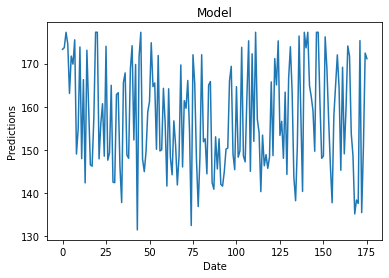

In [29]:
# 9. PREDICTION 

predictions = pd.DataFrame({"Predictions": predict}, index= pd.date_range(start= df.index[1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")


read_df['Predictions'].plot()
plt.title('Model')
plt.xlabel('Date')
plt.ylabel("Predictions")
plt.show()




Buy price and date
            Predictions
Date                   
2021-08-30   142.309655
Sell price and date
            Predictions
Date                   
2021-09-05   177.288715
2021-09-06   177.288715


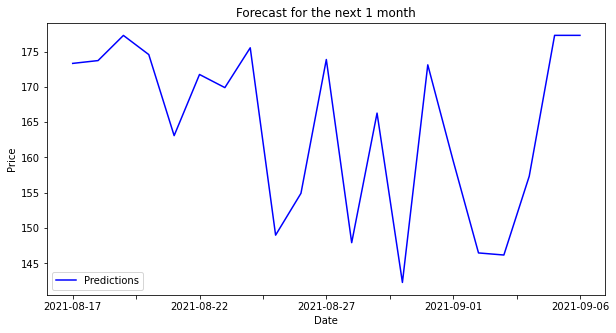

In [34]:
# FUTURE - ONE MONTH PREDICTION

onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one_month_predictions.cvs")

onemonth_df_pred = pd.read_csv("one_month_predictions_Date.csv")
onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

